In [76]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score


### Carregando o dataset

In [77]:
data = pd.read_csv('../data/csv/candidates_info.csv', sep=',', encoding='utf-8')

In [78]:
data.sample(5)

,numinscricao,nome,datanasc,classificacao,opcao_curso_2,opcao_3_curso,habilidades,nota_final,nota_cg,nota_etapa_1,disc1,disc2,disc3,nota_ce,nota_redacao,nota_etapa_2,opcao_curso_1,id_referencia_curso,nome_referencia_curso,ano
176013,2422644-0,MILLY ARIELY BRANCHES BELMONT,15/06/04,2.126,07063,No,No,"35,236","27,381","27,381",5,3,4,"24,00","19,09","43,091",6063,6063,Medicina - Integral - Manaus,2022
44589,6413169-6,MARKLEISON SANTOS DOS SANTOS,18/02/01,327.000,02002,03002,No,"32,327","27,381","27,381",5,2,4,"22,00","15,27","37,273",1002,1002,Administração - Vespertino - Manaus,2019
152427,2544026-8,SILAS JEAN PINHO,12/12/00,28.000,02040,03040,No,"31,773","25,000","25,000",4,1,6,"22,00","16,55","38,545",1040,2040,Licenciatura em Geografia - Noturno - Tabatinga,2022
135791,1242810-8,LAUANNE VITORIA TEIXEIRA SOARES,12/03/03,1.596,06063,07063,No,"46,693","40,476","40,476",5,3,7,"30,00","22,91","52,909",5063,7063,Medicina - Integral - Manaus,2021
5555,6365989-1,JENNIFER TAVEIRA DO NASCIMENTO,18/11/01,633.000,07016,No,No,"35,344","32,143","32,143",5,0,6,"22,00","16,55","38,545",6016,6016,Enfermagem - Integral - Manaus,2019


In [79]:
# Exploring scores
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184389 entries, 0 to 184388
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   numinscricao           184389 non-null  object 
 1   nome                   184389 non-null  object 
 2   datanasc               184389 non-null  object 
 3   classificacao          184389 non-null  float64
 4   opcao_curso_2          184389 non-null  object 
 5   opcao_3_curso          184389 non-null  object 
 6   habilidades            184389 non-null  object 
 7   nota_final             184389 non-null  object 
 8   nota_cg                184389 non-null  object 
 9   nota_etapa_1           184389 non-null  object 
 10  disc1                  184389 non-null  int64  
 11  disc2                  184389 non-null  int64  
 12  disc3                  184389 non-null  int64  
 13  nota_ce                184389 non-null  object 
 14  nota_redacao           184389 non-nu

In [80]:
# Removing fields

def replace_comma(numberst: str):
    return numberst.replace(',', '.')

def parse_column_float(local_data, column):
    return local_data[column].apply(replace_comma).astype(float)

fields = ['nota_final', 'nota_etapa_1', 'nota_etapa_2', 'nota_redacao', 'ano']
data_fields = data.filter(items=fields)

data_fields['nota_final'] = parse_column_float(data_fields, 'nota_final')
data_fields['nota_etapa_1'] = parse_column_float(data_fields, 'nota_etapa_1')
data_fields['nota_etapa_2'] = parse_column_float(data_fields, 'nota_etapa_2')
data_fields['nota_redacao'] = parse_column_float(data_fields, 'nota_redacao')

data_fields.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184389 entries, 0 to 184388
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   nota_final    184389 non-null  float64
 1   nota_etapa_1  184389 non-null  float64
 2   nota_etapa_2  184389 non-null  float64
 3   nota_redacao  184389 non-null  float64
 4   ano           184389 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 7.0 MB


In [81]:
# Exploring data
MAX_SCORE = 100

def define_score_level(score: float):
    if score < 10: return 1 # F
    elif score < 20: return 2 # E
    elif score < 30: return 3 # D-
    elif score < 40: return 4 # D+
    elif score < 50: return 5 # C-
    elif score < 60: return 6 # C+
    elif score < 70: return 7 # B-
    elif score < 80: return 8 # B+
    elif score < 90: return 9 # A-
    else: return 10 # A+

data_fields['desempenho_final'] = data_fields['nota_final'].apply(define_score_level)
data_fields.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184389 entries, 0 to 184388
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   nota_final        184389 non-null  float64
 1   nota_etapa_1      184389 non-null  float64
 2   nota_etapa_2      184389 non-null  float64
 3   nota_redacao      184389 non-null  float64
 4   ano               184389 non-null  int64  
 5   desempenho_final  184389 non-null  int64  
dtypes: float64(4), int64(2)
memory usage: 8.4 MB


<Axes: >

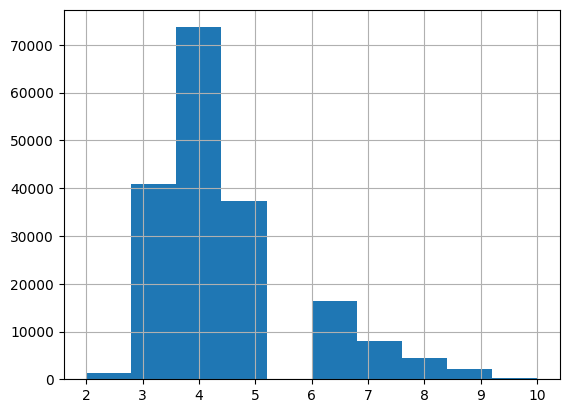

In [82]:
data_fields['desempenho_final'].hist()

<Axes: >

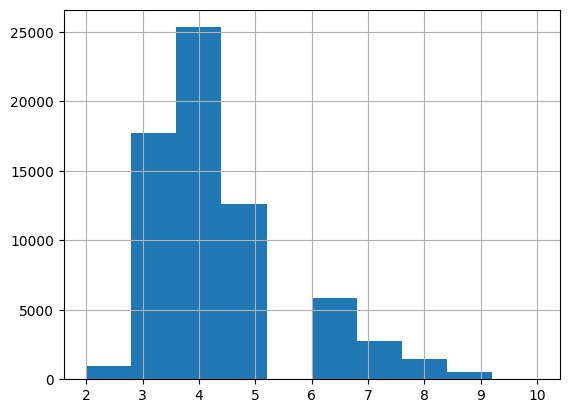

In [83]:
# 2019
data_fields[data_fields['ano'] == 2019]['desempenho_final'].hist()

<Axes: >

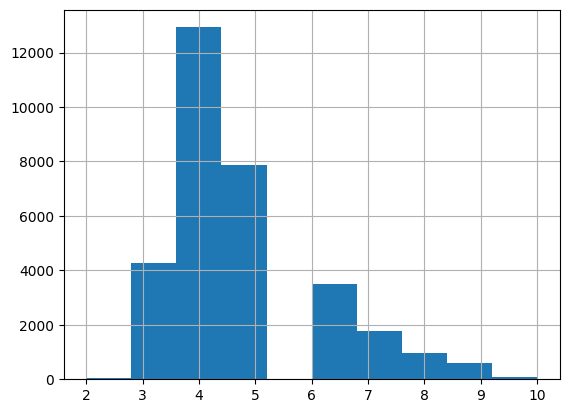

In [84]:
# 2020
data_fields[data_fields['ano'] == 2020]['desempenho_final'].hist()

<Axes: >

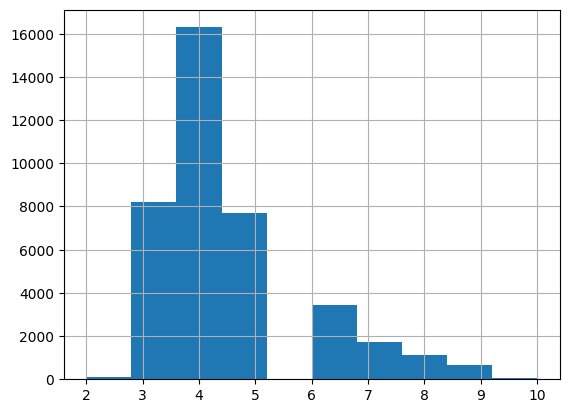

In [85]:
# 2021
data_fields[data_fields['ano'] == 2021]['desempenho_final'].hist()

<Axes: >

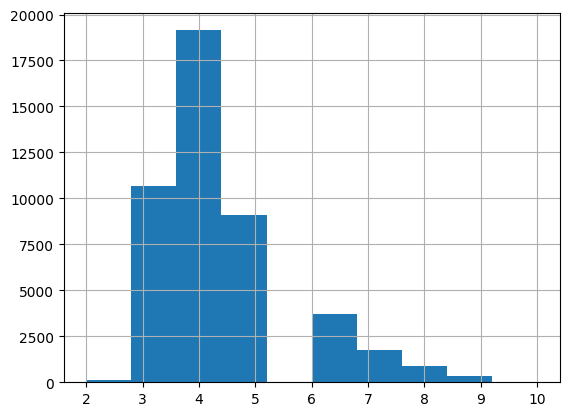

In [86]:
# 2022
data_fields[data_fields['ano'] == 2022]['desempenho_final'].hist()

In [87]:
# Correlação entre as notas separadas (nota 1, nota 2 e redação) nota final
data_fields.corr()

,nota_final,nota_etapa_1,nota_etapa_2,nota_redacao,ano,desempenho_final
nota_final,1.000000,0.943257,0.945530,0.627285,0.006360,0.975476
nota_etapa_1,0.943257,1.000000,0.797212,0.521188,-0.039450,0.919773
nota_etapa_2,0.945530,0.797212,1.000000,0.670785,0.051116,0.922716
nota_redacao,0.627285,0.521188,0.670785,1.000000,0.311510,0.612799
ano,0.006360,-0.039450,0.051116,0.311510,1.000000,0.006336
desempenho_final,0.975476,0.919773,0.922716,0.612799,0.006336,1.000000


In [88]:
X = data_fields.drop(['desempenho_final'], axis=1)
Y = data_fields['desempenho_final']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

classifier = DecisionTreeClassifier(random_state=42)
model = classifier.fit(X_train, Y_train)

### Treinamento - Árvore de decisão (Somente classificador)

In [89]:
predictions = model.predict(X_test)
print(predictions)

[4 3 4 ... 5 5 4]


In [90]:
# Other metrics
tree_mse = mean_squared_error(Y_test, predictions)
tree_rmse = np.sqrt(tree_mse)

print("Média de erros:") 
print(tree_rmse) 

print("5 primeiras labels verdeiras:")
print(Y_test[:5])

print("5 primeiras labels que o algoritmo preveu:")
print(predictions[:5])

Média de erros:
0.0
5 primeiras labels verdeiras:
104870    4
110487    3
101240    4
44839     3
173480    3
Name: desempenho_final, dtype: int64
5 primeiras labels que o algoritmo preveu:
[4 3 4 3 3]


### Treinamento - Árvore de decisão (Classificador e Técnica de Validação Cruzada)

In [91]:
# Validação cruzada
scores = cross_val_score(classifier, X_train, Y_train, scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [92]:
def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard Desviation: ", scores.std())

display_scores(tree_rmse_scores)

Scores:  [0.         0.         0.         0.         0.00823359 0.
 0.         0.         0.         0.        ]
Mean:  0.0008233590595890649
Standard Desviation:  0.0024700771787671944
